# 보스턴 집값 예측 모델
- 가지수, 데이터양
- 13가지 항목 독립변수, 주택가격 종속변수
- 회귀분석

#### 1) 데이터 확인
#### 2) 데이터 전처리 
- 결측치 처리 (0값 주의), 결측량 (5% 미만, 5% 이상인 경우 훈련이 힘들수있음) 
- 데이터 속성확인(범주형/연속형)
- 데이터 분리 (train data / test data / validation data)
- 실수값 (표준화) train data로 표준화해야함
- 상관관계 (독립변수간 상관관계, 다중공선성 확인)
- 다중공선성 (VIF > 10, VIF 지수가 10이상인 독립변수를 제거)
- 이상치 처리
- t/ p-value


- cf) validation data : 학습이 완료된 모델 검증
test data : 학습과 검증이 완료된 모델 평가

#### 3) 모델 구성
#### 4) 학습
#### 5) 검증
- 교차검증-kfold (test data 안씀)

#### 6) 평가
- score/R2 (test data 사용)

In [1]:
# 데이터 불러오기

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
house = pd.read_excel('BostonHousing.xls')
house

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


In [4]:
# boston_house_price = datasets.load_boston()

In [5]:
# from sklearn import datasets
# house['Price'] = boston_house_price.target

In [6]:
# house

In [7]:
# 데이터 전처리

In [8]:
house.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

In [9]:
house.isna().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

In [10]:
house_d = house.drop(columns = ['MEDV','CAT. MEDV'])
house_d

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [11]:
# 데이터셋 나누기 (train / test)

from sklearn.model_selection import train_test_split

hd_train, hd_test, hdt_train, hdt_test = train_test_split(house_d, house.MEDV, test_size=0.2, random_state=1)

In [12]:
hd_train.shape, hdt_train.shape

((404, 13), (404,))

In [13]:
hd_test.shape, hdt_test.shape

((102, 13), (102,))

In [14]:
# train data 표준화
hd_train_sc = (hd_train - hd_train.mean()) / hd_train.std()
print(hd_train_sc)

hdt_train_sc = (hdt_train - hdt_train.mean()) / hdt_train.std()
print(hdt_train_sc)

         CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
42  -0.388767 -0.494980 -0.608535 -0.292931 -0.898469 -0.144788 -2.147367   
58  -0.387352  0.578521 -0.868450 -0.292931 -0.855695 -0.179610 -1.356139   
385  1.433772 -0.494980  1.025420 -0.292931  1.257318 -1.438988  1.056057   
78  -0.398065 -0.494980  0.255899 -0.292931 -0.992571 -0.053382 -0.498391   
424  0.556992 -0.494980  1.025420 -0.292931  0.264972 -1.021130  0.093279   
..        ...       ...       ...       ...       ...       ...       ...   
255 -0.400358  2.940224 -1.086018 -0.292931 -1.377533 -0.569901 -1.709741   
72  -0.394218 -0.494980 -0.039060 -0.292931 -1.197884 -0.295681 -2.105355   
396  0.237745 -0.494980  1.025420 -0.292931  1.197435  0.197624  0.982536   
235 -0.368110 -0.494980 -0.712209 -0.292931 -0.393741 -0.265213 -0.225313   
37  -0.395476 -0.494980 -0.747254 -0.292931 -0.462179 -0.607624 -0.925515   

          DIS       RAD       TAX   PTRATIO         B     LSTAT  
42   0.89

In [15]:
# test data 표준화
hd_test_sc = (hd_test - hd_train.mean()) / hd_train.std()
print(hd_test_sc)

hdt_test_sc = (hdt_test - hdt_train.mean()) / hdt_train.std()
print(hdt_test_sc)

         CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
307 -0.398845  0.922042 -1.299206 -0.292931 -0.693156  0.841822  0.082776   
343 -0.401457  1.866723 -1.065576 -0.292931 -0.590499  0.619835 -0.403864   
47  -0.379172 -0.494980 -0.608535 -0.292931 -0.898469 -0.346463  0.614930   
67  -0.397908  0.041771 -0.731191 -0.292931 -1.232103 -0.566999 -1.629218   
362 -0.002103 -0.494980  1.025420 -0.292931  1.856147 -1.315662  0.989538   
..        ...       ...       ...       ...       ...       ...       ...   
92  -0.399642  0.707342  0.578601 -0.292931 -0.761594  0.251307 -0.501892   
224 -0.369763 -0.494980 -0.712209 -0.292931 -0.419405  2.897744  0.362857   
110 -0.392438 -0.494980 -0.367603 -0.292931 -0.282530 -0.107065 -0.473884   
426  0.934731 -0.494980  1.025420 -0.292931  0.264972 -0.626486 -0.288331   
443  0.685390 -0.494980  1.025420 -0.292931  1.599506  0.313695  1.122576   

          DIS       RAD       TAX   PTRATIO         B     LSTAT  
307 -0.30

In [16]:
# 다른 방법_1
# bost["CRIM"] = (house.CRIM - house.CRIM.mean()) / house.CRIM.std()
# bost["ZN"] = (house.ZN - house.ZN.mean()) / house.ZN.std()
# bost["INDUS"] = (house.INDUS - house.INDUS.mean()) / house.INDUS.std()
# bost["CHAS"] = (house.CHAS - house.CHAS.mean()) / house.CHAS.std()
# bost["NOX"] = (house.NOX - house.NOX.mean()) / house.NOX.std()
# bost["RM"] = (house.RM - house.RM.mean()) / house.RM.std()
# bost["AGE"] = (house.AGE - house.AGE.mean()) / house.AGE.std()
# bost["DIS"] = (house.DIS - house.DIS.mean()) / house.DIS.std()
# bost["RAD"] = (house.RAD - house.RAD.mean()) / house.RAD.std()
# bost["TAX"] = (house.TAX - house.TAX.mean()) / house.TAX.std()
# bost["PTRATIO"] = (house.PTRATIO - house.PTRATIO.mean()) / house.PTRATIO.std()
# bost["B"] = (house.B - house.B.mean()) / house.B.std()
# bost["LSTAT"] = (house.LSTAT - house.LSTAT.mean()) / house.LSTAT.std()
# bost["MEDV"] = (house.MEDV - house.MEDV.mean()) / house.MEDV.std()

In [17]:
# 다른 방법_2 (라이브러리 사용)
'''
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss_columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
hd_train[ss_columns] = ss.fit_transform(hd_train[ss_columns])
hd_train
'''

"\nfrom sklearn.preprocessing import StandardScaler\n\nss = StandardScaler()\nss_columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']\nhd_train[ss_columns] = ss.fit_transform(hd_train[ss_columns])\nhd_train\n"

In [18]:
# 표준화된 데이터 상관계수 확인

<AxesSubplot:>

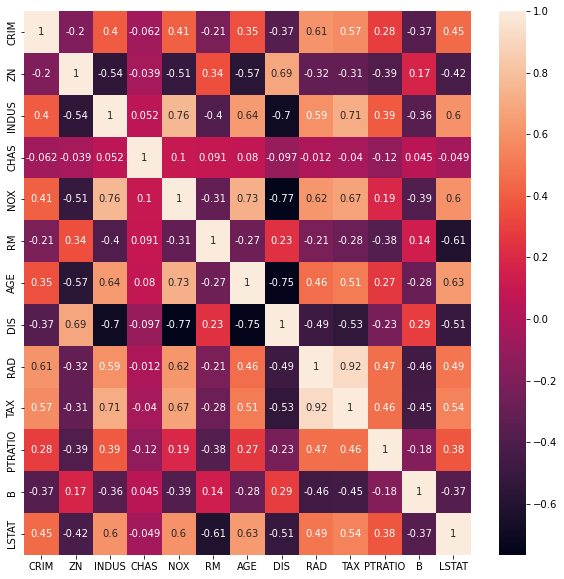

In [19]:
plt.figure(figsize=(10,10))
hd_train_sc_corr = hd_train_sc.corr()
sns.heatmap(hd_train_sc_corr , annot=True)

In [20]:
# 원데이터 상관계수 확인

<AxesSubplot:>

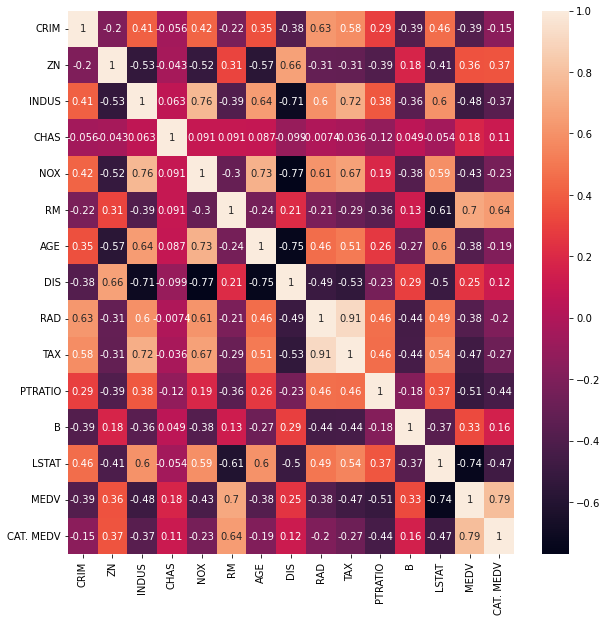

In [21]:
plt.figure(figsize=(10,10))
house_corr = house.corr()
sns.heatmap(house_corr , annot=True)

In [22]:
# 다중공선성 확인

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = hd_train_sc.columns
vif['VIF factor'] = [variance_inflation_factor(hd_train_sc.values, i) for i in range(hd_train_sc.shape[1])]
vif.round(1)

,features,VIF factor
0,CRIM,1.7
1,ZN,2.5
2,INDUS,3.8
3,CHAS,1.1
4,NOX,4.4
5,RM,1.9
6,AGE,3.2
7,DIS,4.2
8,RAD,8.1
9,TAX,9.8


## 가장 높은 VIF값을 가진 TAX 삭제한 모델

In [25]:
hd_train_sc_tax = hd_train_sc.drop(columns = ['TAX'])
hd_test_sc_tax = hd_test_sc.drop(columns = ['TAX'])

In [26]:
vif = pd.DataFrame()
vif['features'] = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']
vif['VIF factor'] = [variance_inflation_factor(hd_train_sc_tax.values, i) for i in range(hd_train_sc_tax.shape[1])]
vif.round(1)

,features,VIF factor
0,CRIM,1.7
1,ZN,2.3
2,INDUS,3.2
3,CHAS,1.1
4,NOX,4.4
5,RM,1.9
6,AGE,3.2
7,DIS,4.2
8,RAD,2.9
9,PTRATIO,1.8


In [27]:
# 회귀 모델 학습

In [28]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
model = lr.fit(hd_train_sc_tax, hdt_train_sc)

In [29]:
model

LinearRegression()

In [30]:
# 정확도
lr.score(hd_test_sc_tax,hdt_test_sc)

0.7530242318706896

In [31]:
pred_test = lr.predict(hd_test_sc_tax)
err = abs(pred_test - hdt_test_sc)/len(hd_test_sc_tax)

In [32]:
# 오차합
err.sum()

0.4253557500039553

## 상관계수가 높아보이는 변수로 만든 모델

In [33]:
h_train_2 = hd_train_sc[['PTRATIO','LSTAT']]
h_train_2

,PTRATIO,LSTAT
42,-0.248270,-0.965653
58,0.581426,-0.820151
385,0.811897,2.498677
78,0.120484,-0.060770
424,0.811897,0.607153
...,...,...
255,-0.939683,-0.488961
72,0.350955,-1.005839
396,0.811897,0.913400
235,-0.478741,-0.263087


In [34]:
h_test_2 = hd_test_sc[['PTRATIO','LSTAT']]
h_test_2

,PTRATIO,LSTAT
307,-0.017799,-0.727307
343,-0.386553,-0.775808
47,-0.248270,0.834413
67,0.212672,-0.648320
362,0.811897,-0.358702
...,...,...
92,-0.109987,-0.640006
224,-0.478741,-1.197070
110,1.134557,0.030688
426,0.811897,0.403450


In [35]:
# 회귀 모델 학습

In [36]:
lr2 = linear_model.LinearRegression()
model2 = lr2.fit(h_train_2, hdt_train_sc)

In [37]:
model2

LinearRegression()

In [38]:
# 정확도
lr2.score(h_test_2,hdt_test_sc)

0.5636430970565703

In [40]:
pred_test2 = lr2.predict(h_test_2)
err2 = abs(pred_test2 - hdt_test_sc)/len(hd_test_sc_tax)

In [41]:
# 오차합
err.sum()

0.4253557500039553

## 모든 독립변수 다 넣은 모델

In [51]:
lr3 = linear_model.LinearRegression()
model3 = lr3.fit(hd_train_sc, hdt_train_sc)

In [52]:
model3

LinearRegression()

In [53]:
# 정확도
lr3.score(hd_test_sc,hdt_test_sc)

0.7634174432138474

In [54]:
pred_test3 = lr3.predict(hd_test_sc)
err3 = abs(pred_test3 - hdt_test_sc)/len(hd_test_sc_tax)

In [56]:
# 오차합
err3.sum()

0.41679253528439175

In [42]:
# 회귀 계수 확인 (데이터 프레임으로 만들기)

In [43]:
h_coefs = pd.DataFrame(zip())

[-0.11304877  0.12275577 -0.04032097  0.07273446 -0.26662283  0.24290275
  0.01044069 -0.34949212  0.14126584 -0.24744491  0.07573083 -0.43371312]
